In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [116]:
start = time.time()
diabets = pd.read_csv('datasets/pima-indians-diabetes.csv' ).dropna(how = 'all')
print(time.time() - start)
diabets.dtypes

0.00766801834106


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [117]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
diabets.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [119]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [120]:
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


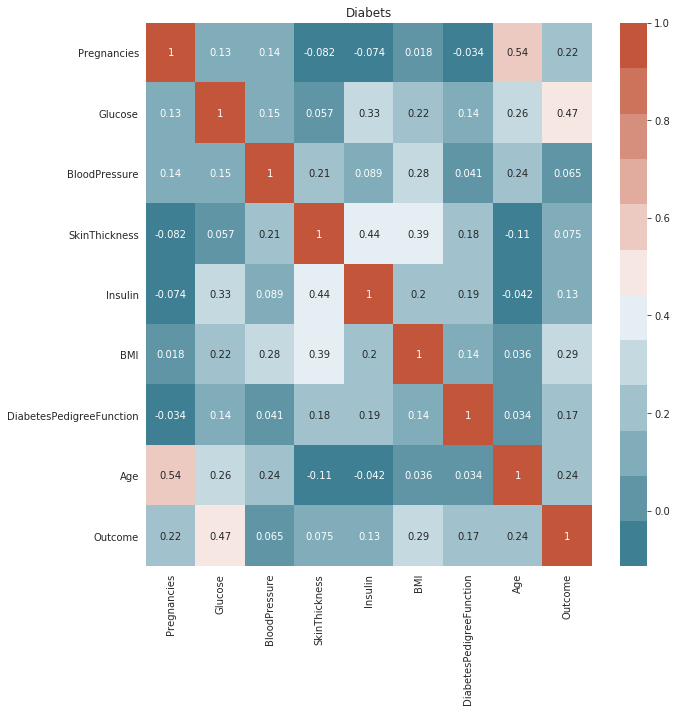

In [121]:
plt.figure(figsize=(10, 10))
df_corr = diabets.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diabets")
plt.show()

In [122]:
diabets['Glucose'] = diabets['Glucose'].replace(0 , np.mean(diabets['Glucose']))
diabets['BloodPressure'] = diabets['BloodPressure'].replace(0 , np.mean(diabets['BloodPressure']))
diabets['SkinThickness'] = diabets['SkinThickness'].replace(0 , np.mean(diabets['SkinThickness']))
diabets['Insulin'] = diabets['Insulin'].replace(0 , np.mean(diabets['Insulin']))
diabets['BMI'] = diabets['BMI'].replace(0 , np.mean(diabets['BMI']))
diabets['DiabetesPedigreeFunction'] = diabets['DiabetesPedigreeFunction'].replace(0 , np.mean(diabets['DiabetesPedigreeFunction']))
diabets['Age'] = diabets['Age'].replace(0 , np.mean(diabets['Age']))

In [123]:
data = diabets.drop(['Outcome'], axis = 1 ).values

In [124]:
scalar = StandardScaler()
data = scalar.fit_transform(data)

In [125]:
model = KMeans(n_clusters=2)

In [126]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
labels = model.predict(data)

In [128]:
diabets['Cluster'] = labels

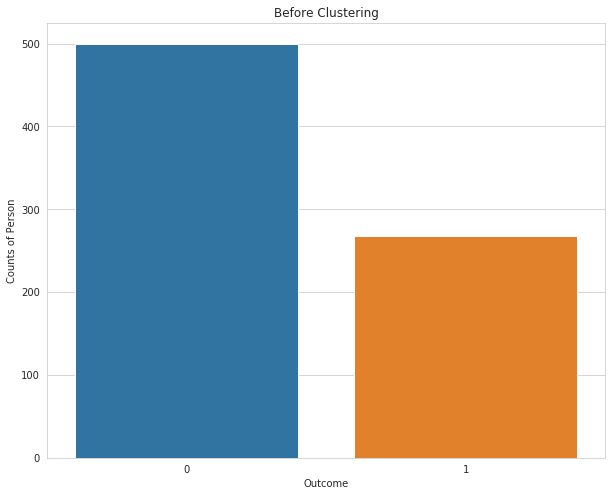

In [130]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Outcome', data = diabets)
plt.xlabel('Outcome')
plt.ylabel('Counts of Person')
plt.title('Before Clustering')
plt.show()

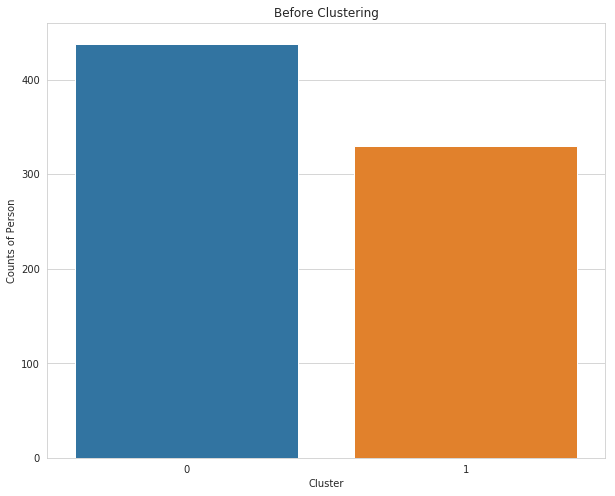

In [131]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Cluster', data = diabets)
plt.xlabel('Cluster')
plt.ylabel('Counts of Person')
plt.title('Before Clustering')
plt.show()

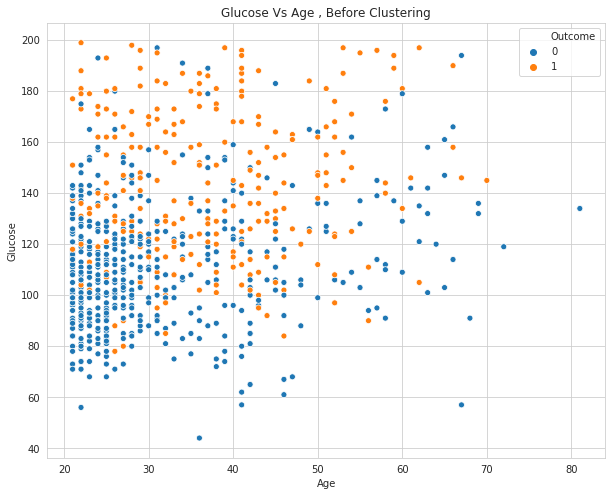

In [132]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'Glucose' , data = diabets , hue = 'Outcome')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glucose Vs Age , Before Clustering')
plt.show()

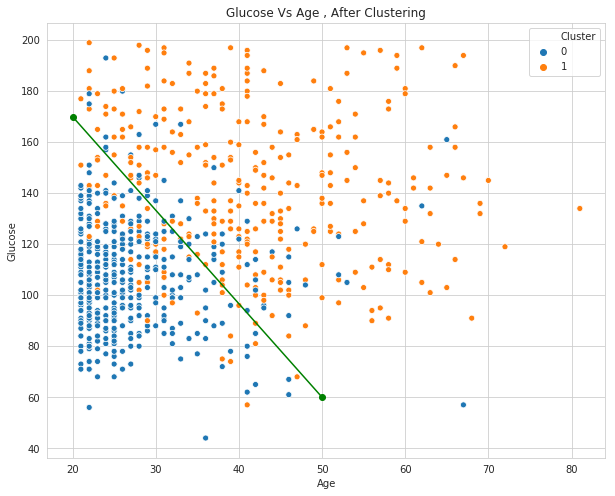

In [156]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'Glucose' , data = diabets , hue = 'Cluster')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glucose Vs Age , After Clustering')
x1, y1 = [20, 50], [170,60]
plt.plot(x1, y1, marker = 'o' , c = 'g')
plt.show()

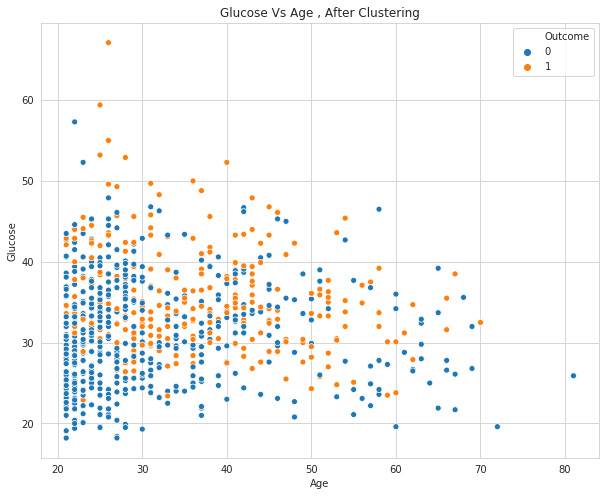

In [134]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'BMI' , data = diabets , hue = 'Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI Vs Age , After Clustering')
plt.show()

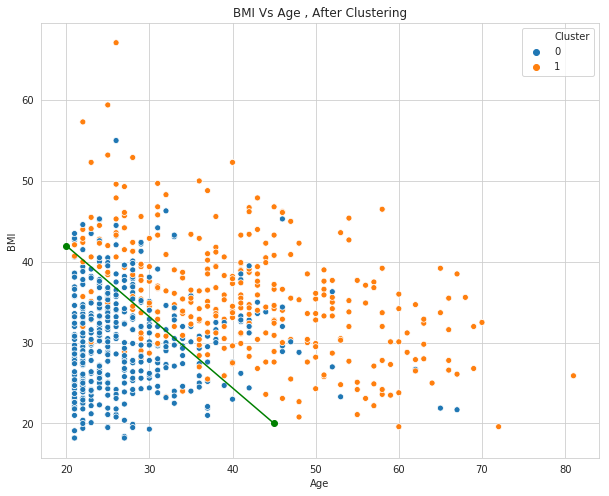

In [159]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'BMI' , data = diabets , hue = 'Cluster')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI Vs Age , After Clustering')
x1, y1 = [20, 45], [42,20]
plt.plot(x1, y1, marker = 'o' , c = 'g')
plt.show()
plt.show()